In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
%matplotlib inline

In [23]:
# fortran compile
compile_command = "gfortran -o test2.exe dvode_f90_m.F90 master_module.F90 zdplaskin_m.F90 master_code.F90 bolsig_x86_64_g.dll"
run_command = "test2.exe"

In [24]:
# compile 실행
# compile_process = subprocess.run(compile_command, shell=True, check=True)
# print("컴파일 완료")

In [25]:
# try:
#     run_process = subprocess.run(run_command, shell=True, check=True)
#     print("실행 완료")
# except subprocess.CalledProcessError as e:
#     print(f"실행 중 오류 발생: {e}")
#     print(f"표준 출력: {e.stdout}")
#     print(f"표준 에러: {e.stderr}")

In [26]:
conditions_path = 'qt_conditions.txt'

df_cond = pd.read_csv(conditions_path,
                 delim_whitespace=True,
                 header=0)

conditions_columns = ['Time_s', 'Reduced field_Td', 'Gas temperature_K', 'Electron temperature_eV', 'Current density_A/cm2', 'Power density_W/cm3']

df_cond.columns = conditions_columns
df_cond['Electron temperature_eV'] = df_cond['Electron temperature_eV']/11604.518
df_cond['Mean Electron Energy_eV'] = df_cond['Electron temperature_eV']*1.5

In [27]:
df_cond

,Time_s,Reduced field_Td,Gas temperature_K,Electron temperature_eV,Current density_A/cm2,Power density_W/cm3,Mean Electron Energy_eV
0,0.000000,22.829,300.0,0.000000,0.000000e+00,0.000000e+00,0.000000
1,0.000007,22.829,300.0,0.701985,1.878600e-08,1.049600e-04,1.052978
2,0.000015,39.361,300.0,0.742030,2.899100e-08,2.792900e-04,1.113045
3,0.000025,58.038,300.0,0.836157,4.621300e-08,6.564300e-04,1.254236
4,0.000033,76.188,300.0,1.055882,1.684200e-05,3.140600e-01,1.583823
5,0.000041,92.470,300.0,1.445041,6.799600e+03,1.558700e+08,2.167561
6,0.000049,107.940,300.0,1.864446,4.783100e+04,1.410100e+09,2.796669


In [28]:
density_path = 'qt_densities.txt'

df_den = pd.read_csv(density_path,
                 delim_whitespace=True,
                 header=0)

den_list= []

with open('qt_species_list.txt', 'r') as file:
    for line in file:
        den_list.append(line.split()[-1])

density_columns = ['Time_s'] + den_list
df_den.columns = density_columns

In [29]:
df_den

,Time_s,E,N,N2,N2(A),N2(B),N2(A'),N2(C),N^+,N2^+,N3^+,N4^+
0,0.000000,3.540000e+04,0.000000e+00,2.447500e+19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000007,3.540000e+04,7.886200e-28,2.447500e+19,1.039800e+03,1.437400e-01,1.235100e+00,1.432600e-03,2.113100e-62,9.288600e-20,5.476400e-32,1.854900e-14
2,0.000015,3.540400e+04,2.971400e-12,2.447500e+19,1.756900e+06,2.114600e+02,3.781800e+03,2.317100e+01,3.160800e-32,1.485800e-04,2.478600e-13,3.934800e+00
3,0.000025,4.149400e+04,2.052100e-07,2.447500e+19,7.341600e+07,8.370900e+03,2.652100e+05,2.817000e+03,7.371200e-24,2.360900e+00,1.637100e-07,6.091800e+03
4,0.000033,1.221700e+07,6.010900e-01,2.447500e+19,2.206300e+10,1.526300e+07,6.232300e+08,9.205100e+06,8.862600e-14,1.092600e+05,5.198000e-01,1.207200e+07
5,0.000041,4.039500e+15,6.453500e+17,2.368700e+19,1.452600e+17,2.153000e+16,2.657800e+17,2.494500e+16,3.071700e+13,5.377000e+14,9.050900e+14,2.566000e+15
6,0.000049,2.402900e+16,5.740900e+18,1.981400e+19,4.077500e+17,2.038800e+17,8.672500e+17,2.780800e+17,2.853900e+14,8.188900e+15,1.234300e+16,3.211400e+15


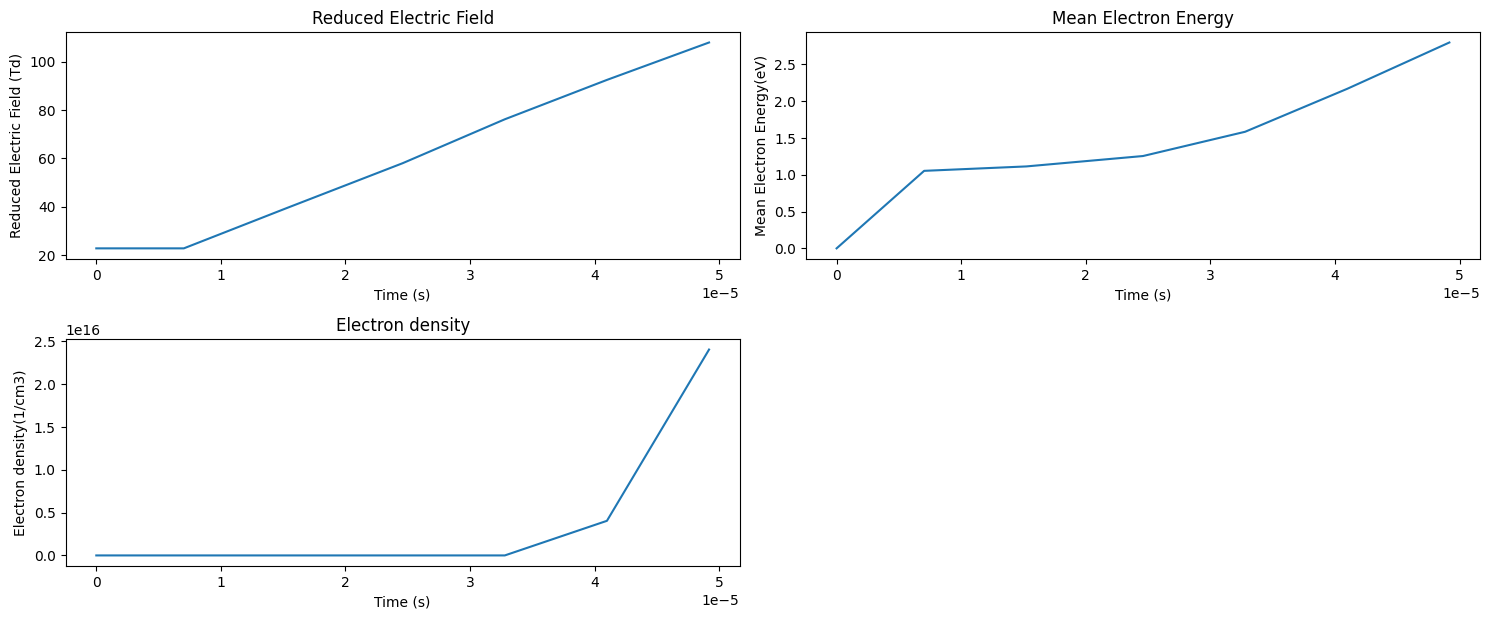

In [30]:
# 결과 플로팅
plt.figure(figsize=(15, 12))

plt.subplot(421)
plt.plot(df_cond['Time_s'], df_cond['Reduced field_Td'])
plt.title('Reduced Electric Field')
plt.xlabel('Time (s)')
plt.ylabel('Reduced Electric Field (Td)')

plt.subplot(422)
plt.plot(df_cond['Time_s'], df_cond['Mean Electron Energy_eV'])
plt.title('Mean Electron Energy')
plt.xlabel('Time (s)')
plt.ylabel('Mean Electron Energy(eV)')

plt.subplot(423)
plt.plot(df_cond['Time_s'], df_den['E'])
plt.title('Electron density')
plt.xlabel('Time (s)')
plt.ylabel('Electron density(1/cm3)')

plt.tight_layout()
plt.show()

In [31]:
df.columns

NameError: name 'df' is not defined